<a href="https://colab.research.google.com/github/heyrobin/DTree-RandomForest-ML/blob/main/Rain_in_Australia_DTree-RF_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the datasets

In [ ]:
!pip install opendatasets --upgrade --quiet


In [ ]:
import opendatasets as od


In [ ]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'


In [ ]:
od.download(dataset_url)

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [ ]:
import os

In [ ]:
data_dir = './weather-dataset-rattle-package'

In [ ]:
os.listdir(data_dir)

['weatherAUS.csv']

In [ ]:
train_csv = data_dir + '/weatherAUS.csv'

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_csv)

This the data of 10 years and here we can obviously understand this is a classification problem that it will rain tommorow or not

# Exploring the stats

In [ ]:
raw_df.shape

(145460, 23)

In [ ]:
raw_df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [ ]:
column_names = raw_df.columns
column_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#checking the statistics of the numerical columns
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [ ]:
#checking the statistic of the categorical columns
raw_df.describe(exclude=['float64']).T

,count,unique,top,freq
Date,145460,3436,2013-11-15,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


understanding the data as we can see there are 23 rows consist of Date categorical and numerical data and further understanding the data alone we can see there are missing values 

Lets understand more about the data 
We have Date, Location, temprature, rainfall, evaportion, sunshine, wind directions, windspeed, humidity, pressure, cloud


In [ ]:
#Check for missing values
raw_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
# checking the null values in the target varable
raw_df['RainTomorrow'].isnull().sum()

3267

In [ ]:
# checking the null values in rain today column
raw_df['RainToday'].isnull().sum()

3261

In [ ]:
raw_df['RainTomorrow'].nunique()

2

In [ ]:
raw_df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
raw_df['RainTomorrow'].value_counts()/len(raw_df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

We can see that 3% of our target column have missing values and also the rain today values are missing

We have to treat the missing values by removing the null values of the target column to make our modeling easier

In [ ]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

In [ ]:
raw_df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

# EDA

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cat_col = raw_df.select_dtypes(include='object').columns.tolist()

In [ ]:
cat_col = ['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
list(enumerate(cat_col))

[(0, 'Location'),
 (1, 'WindGustDir'),
 (2, 'WindDir9am'),
 (3, 'WindDir3pm'),
 (4, 'RainToday'),
 (5, 'RainTomorrow')]

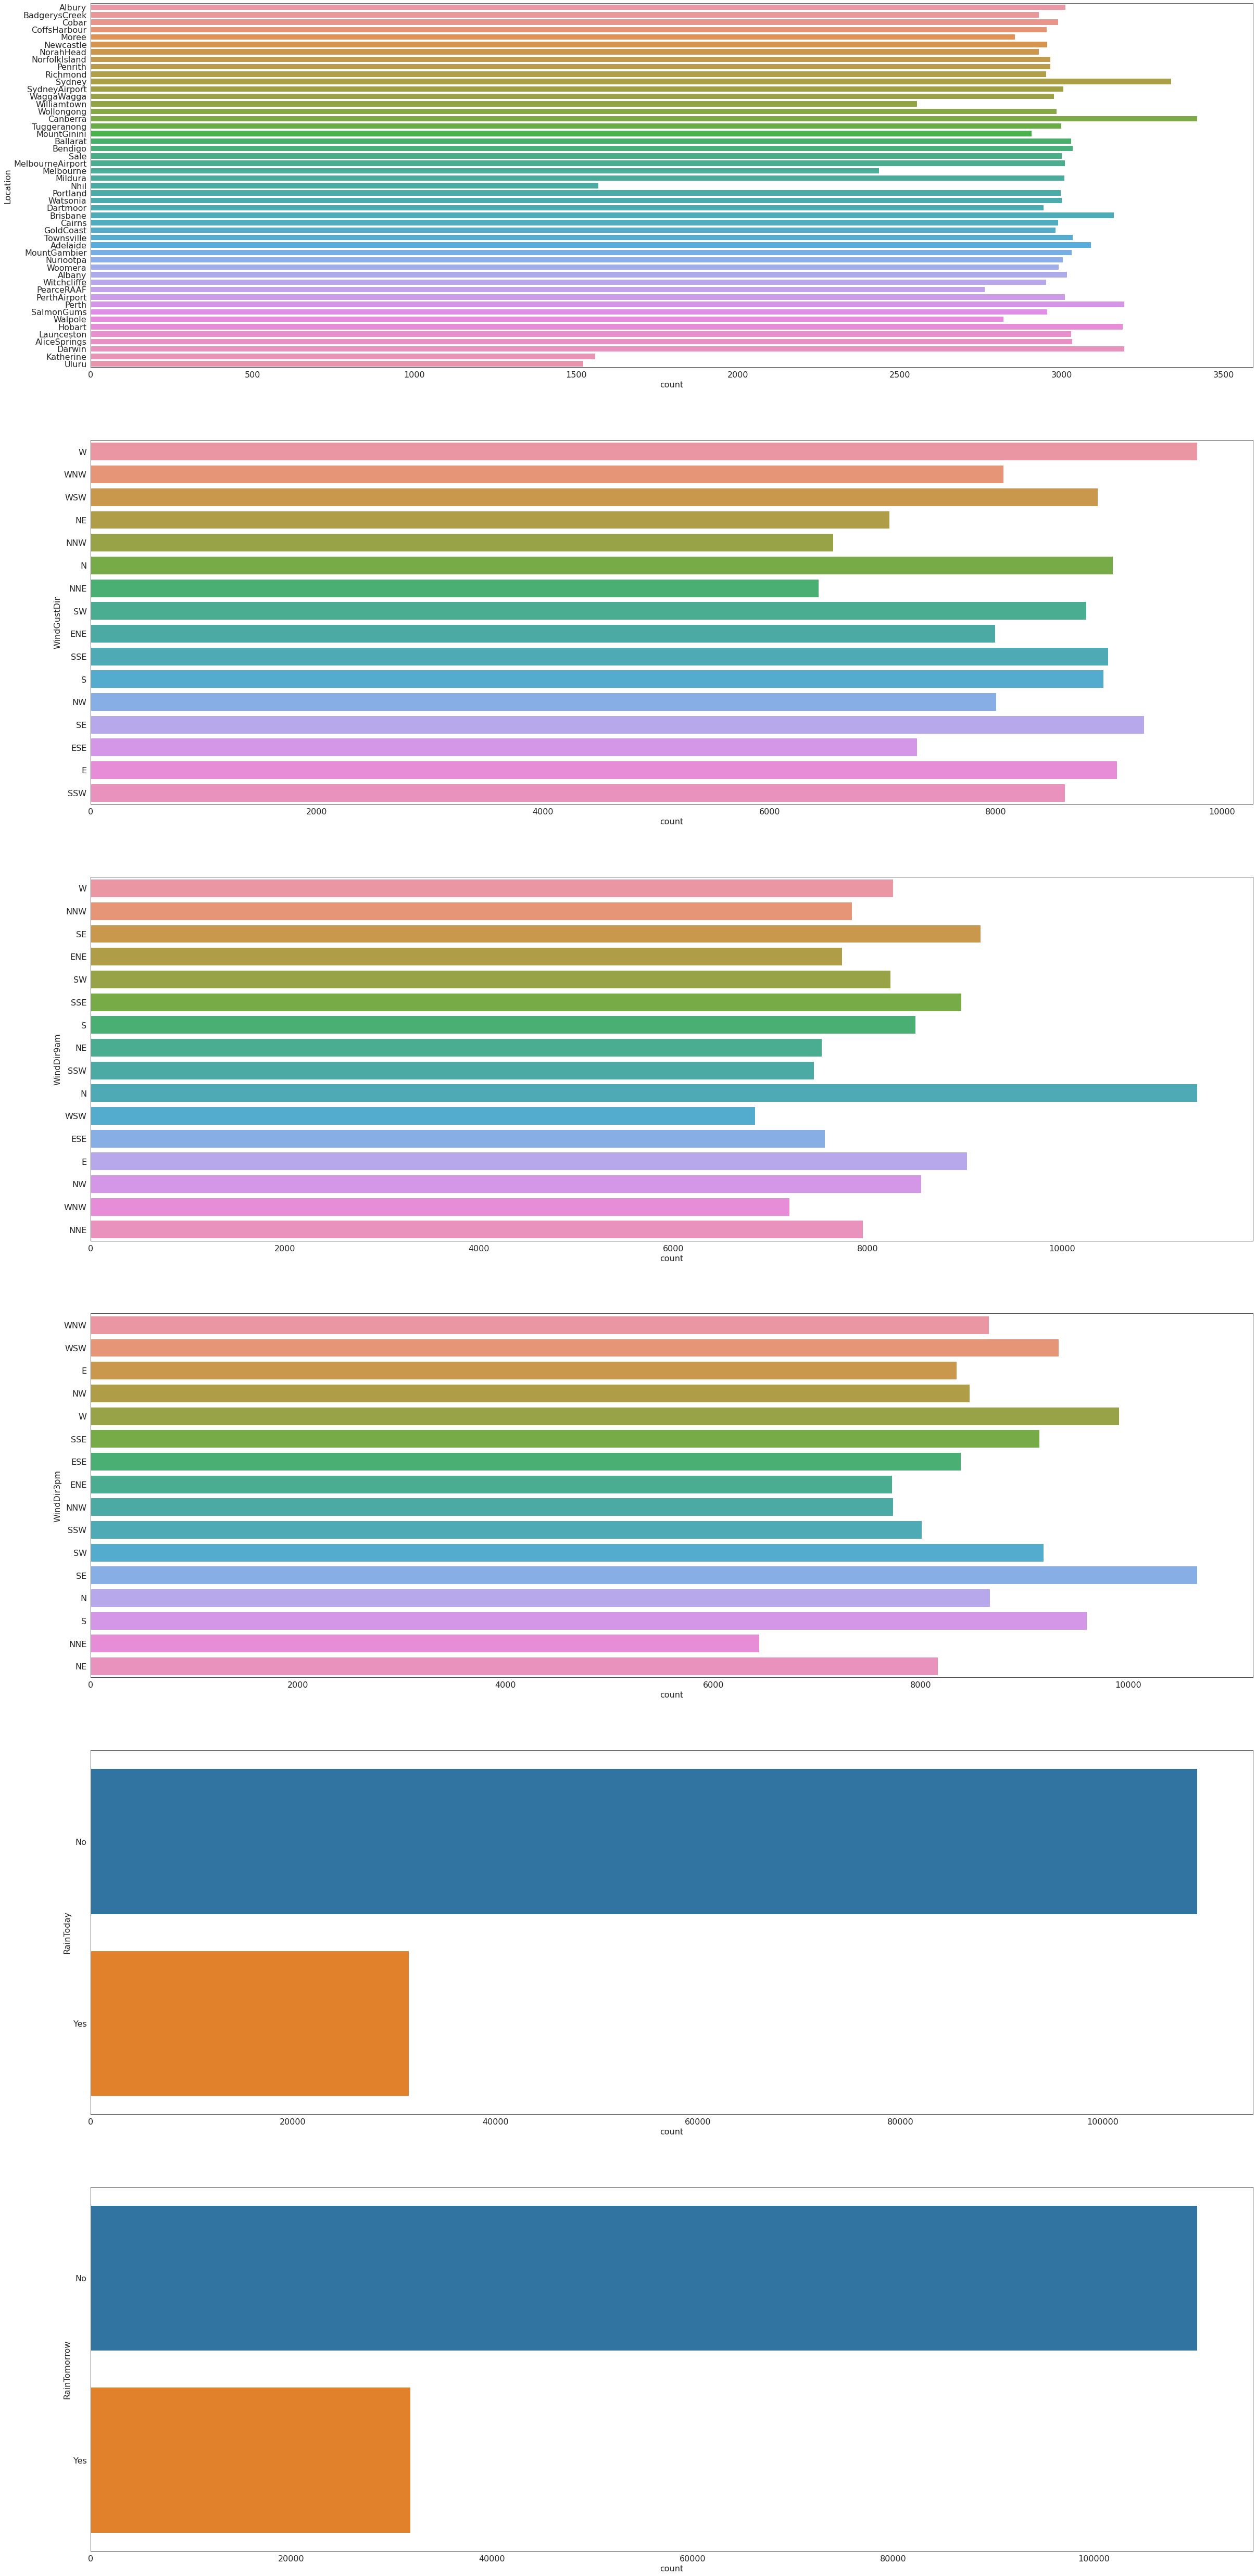

In [ ]:
#themes
sns.set_style('white')
matplotlib.rcParams['font.size'] = 16
#matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'



plt.figure(figsize=(40,90))

for i in enumerate(cat_col):
    plt.subplot(6,1,i[0]+1)
    sns.countplot(y= raw_df[i[1]])
    
    


In [ ]:
num_cols = raw_df.select_dtypes(include = 'float').columns.tolist()


In [ ]:
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
list(enumerate(num_cols))


[(0, 'MinTemp'),
 (1, 'MaxTemp'),
 (2, 'Rainfall'),
 (3, 'Evaporation'),
 (4, 'Sunshine'),
 (5, 'WindGustSpeed'),
 (6, 'WindSpeed9am'),
 (7, 'WindSpeed3pm'),
 (8, 'Humidity9am'),
 (9, 'Humidity3pm'),
 (10, 'Pressure9am'),
 (11, 'Pressure3pm'),
 (12, 'Cloud9am'),
 (13, 'Cloud3pm'),
 (14, 'Temp9am'),
 (15, 'Temp3pm')]

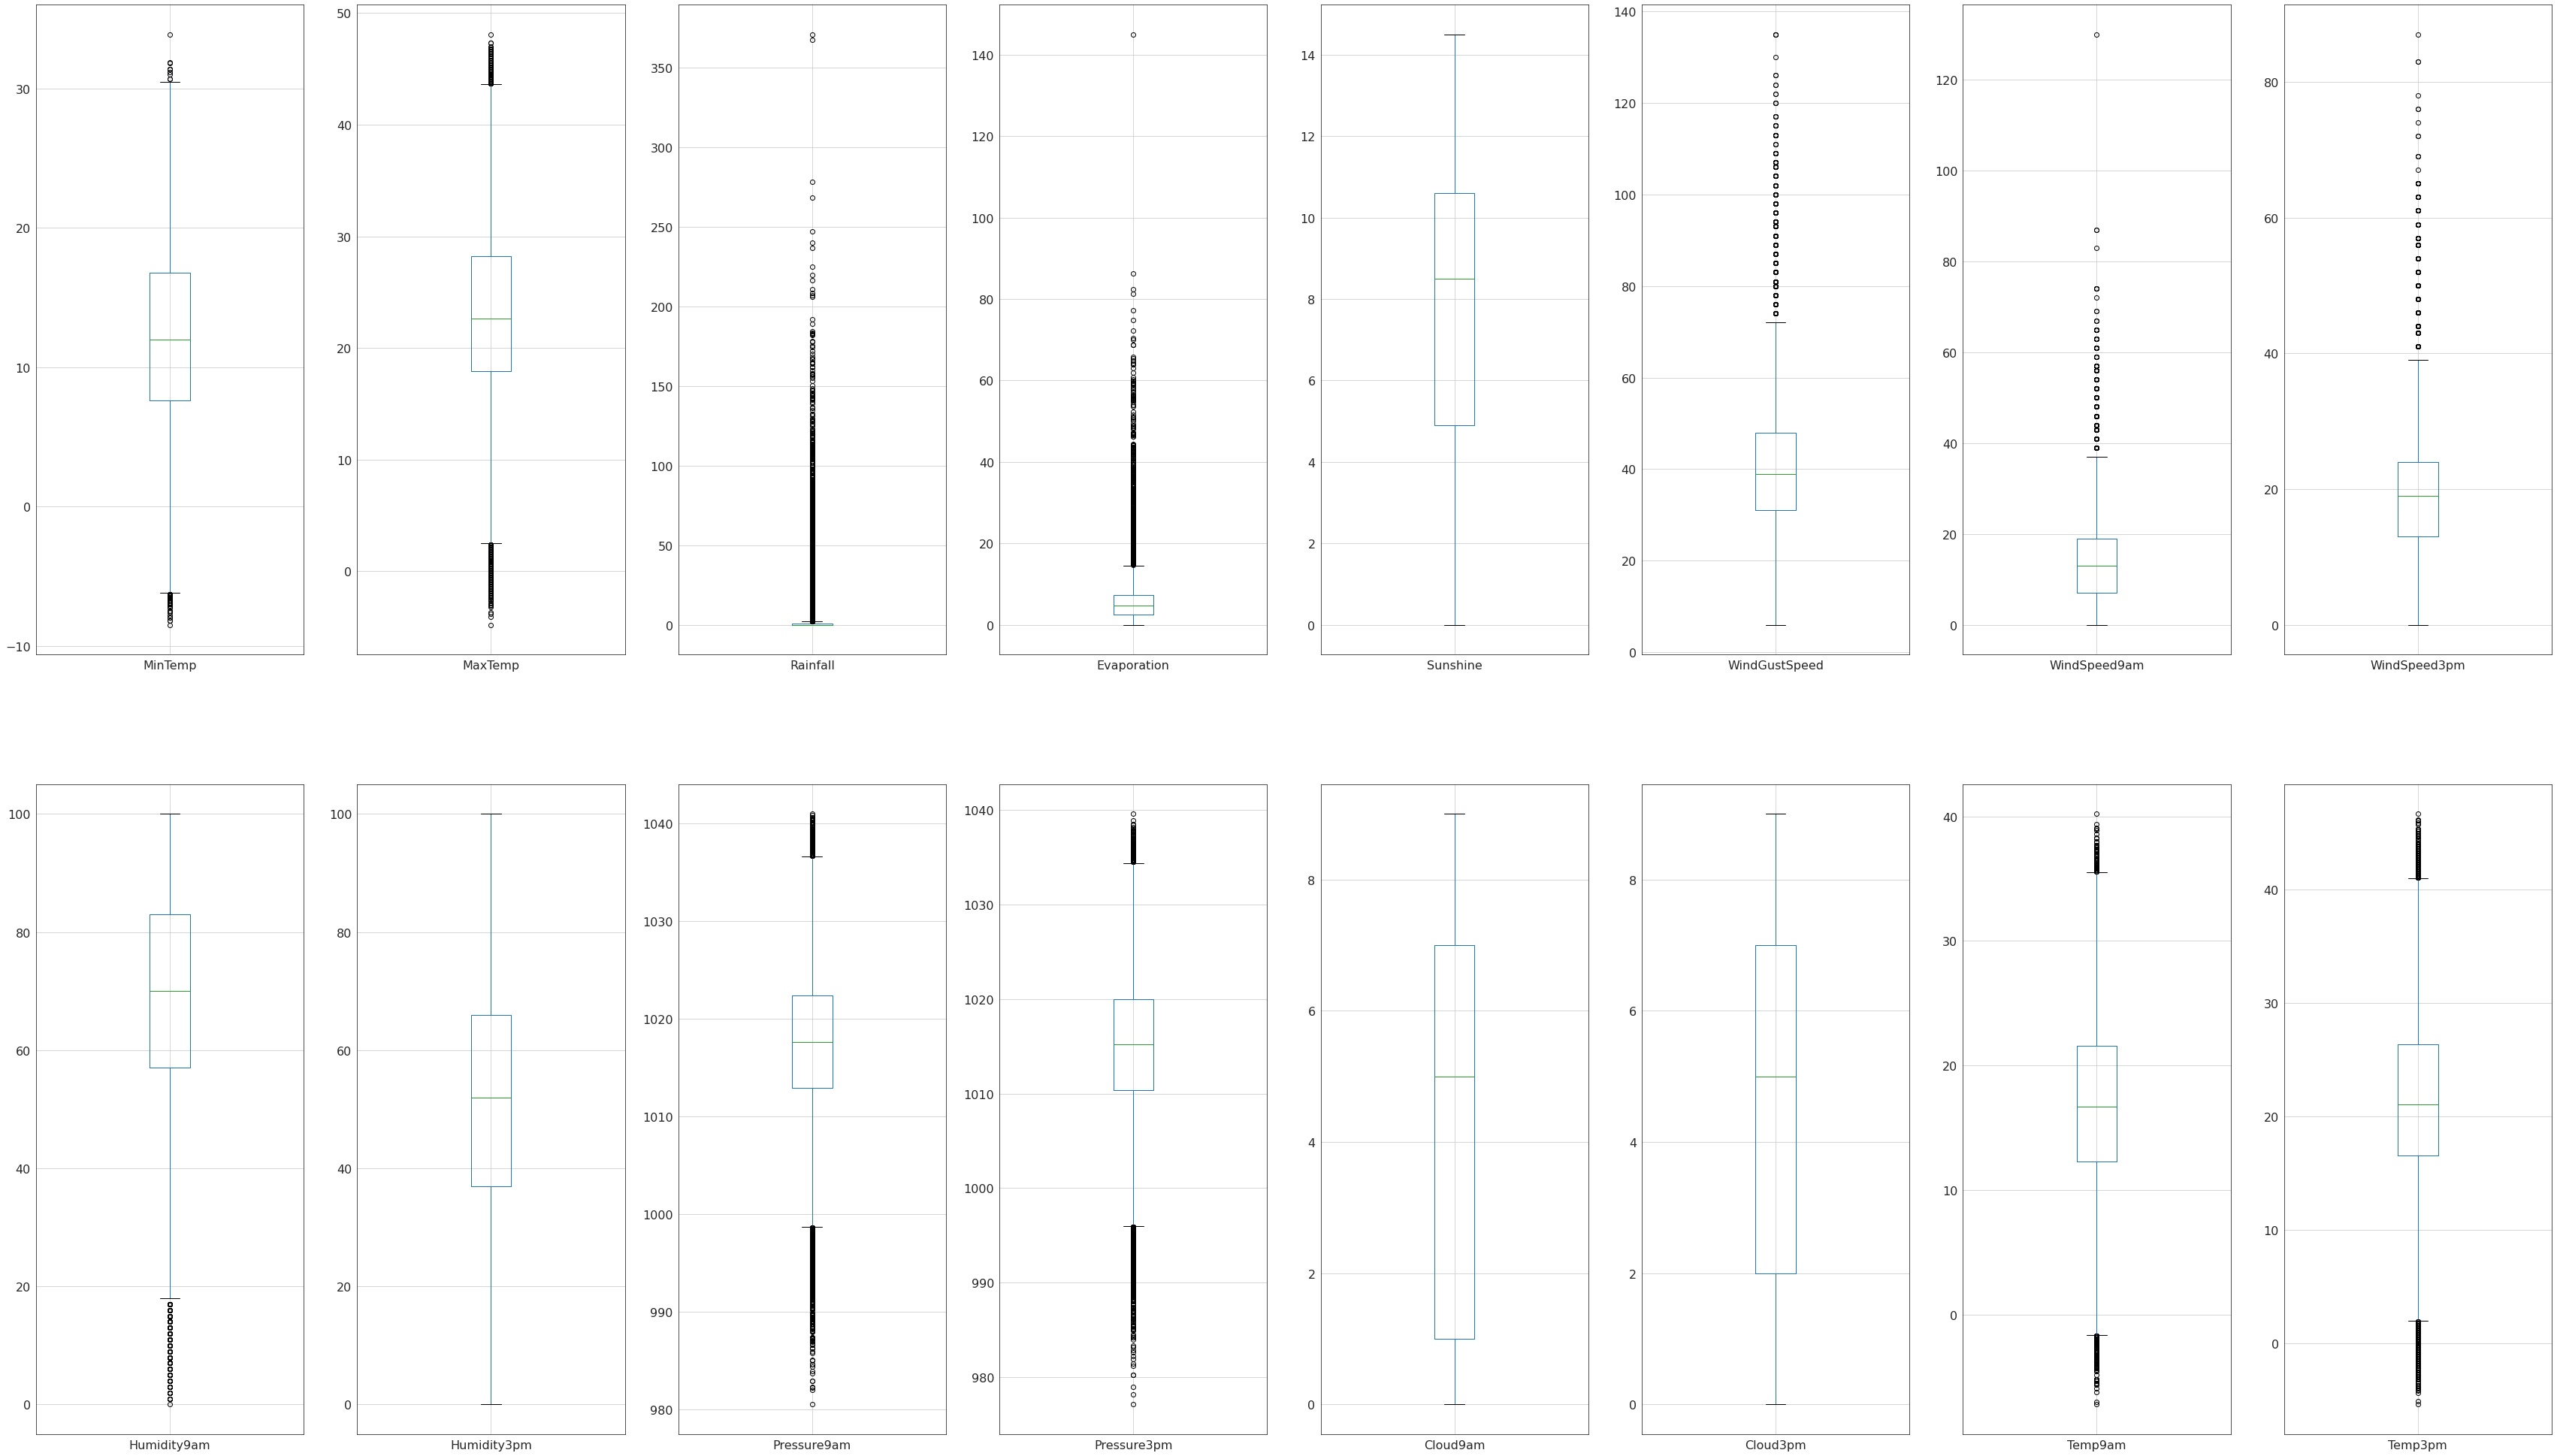

In [ ]:
plt.figure(figsize=(60,35))

for i in enumerate(num_cols):
    plt.subplot(2,8,i[0]+1)
    raw_df.boxplot(column=[i[1]])

# Exploring Categorical Variables

In [ ]:
cat_col = raw_df.select_dtypes(include='object')
cat_col.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


There are 7 columns 



*   The First column is Date 
*   Then there are 4 columns with Location, WindGustDir, WindDir9am and WindDir3pm
*   RainToday is a binary column
*   RainTomorrow is a binary and target columns which we have to peredict





In [ ]:
cat_col.isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

### Prepare Dataset for Training The Model

In [ ]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

In [ ]:
raw_df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

### Train Validation and Split

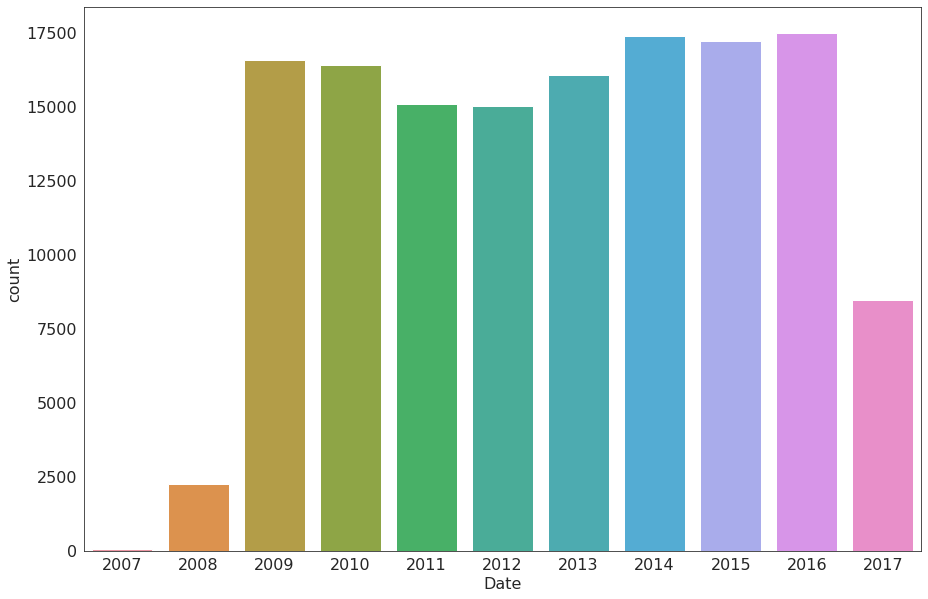

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.countplot(x =pd.to_datetime(raw_df.Date).dt.year);

In [ ]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [ ]:
print('Train DF Shape :', train_df.shape)
print('Val DF Shape :', val_df.shape)
print('Test DF Shape :', test_df.shape)

Train DF Shape : (98988, 23)
Val DF Shape : (17231, 23)
Test DF Shape : (25974, 23)


Input and Target Columns
Let's identify the input and target columns.

In [ ]:
input_col = train_df.columns[1:-1]
target_col = 'RainTomorrow'

In [ ]:
input_col

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [ ]:
train_inputs = train_df[input_col].copy()
train_target = train_df[target_col].copy()

val_inputs = val_df[input_col].copy()
val_target = val_df[target_col].copy()

test_inputs = test_df[input_col].copy()
test_target = test_df[target_col].copy()

Let's also identify the numeric and categorical columns.



In [ ]:
num_cols = train_inputs.select_dtypes(exclude='object').columns.tolist()
cat_col = train_inputs.select_dtypes(include='object').columns.tolist()

### Impute Missing Numeric Values

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy= 'mean').fit(raw_df[num_cols])

In [ ]:
train_inputs[num_cols] = imputer.transform(train_inputs[num_cols])
val_inputs[num_cols]= imputer.transform(val_inputs[num_cols])
test_inputs[num_cols]= imputer.transform(test_inputs[num_cols])

In [ ]:
test_inputs[num_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### Scaling Numeric Features


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(raw_df[num_cols])

train_inputs[num_cols] = scaler.transform(train_inputs[num_cols])
val_inputs[num_cols] = scaler.transform(val_inputs[num_cols])
test_inputs[num_cols] = scaler.transform(test_inputs[num_cols])

In [ ]:
val_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


### Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

train_inputs[cat_col] = train_inputs[cat_col].fillna('Unkown')
val_inputs[cat_col] = val_inputs[cat_col].fillna('Unkown')
test_inputs[cat_col] = test_inputs[cat_col].fillna('Unkown')

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[cat_col])

In [ ]:
encoded_cols = list(encoder.get_feature_names(cat_col))

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[cat_col])
val_inputs[encoded_cols] =encoder.transform(val_inputs[cat_col])
test_inputs[encoded_cols] =encoder.transform(test_inputs[cat_col])

In [ ]:
X_train = train_inputs[num_cols + encoded_cols]
X_val = val_inputs[num_cols + encoded_cols]
X_test = test_inputs[num_cols + encoded_cols]

# Decision Tree

## Train

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
%%time
model = DecisionTreeClassifier().fit(X_train, train_target)

CPU times: user 3.46 s, sys: 9.34 ms, total: 3.47 s
Wall time: 3.48 s


## Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
pd.value_counts(train_preds)

No     76707
Yes    22281
dtype: int64

In [ ]:
train_probs = model.predict_proba(X_train)

In [ ]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
accuracy_score(train_target,train_preds)

0.9999797955307714

In [ ]:
model.score(X_val, val_target)

0.7924670651732343

In [ ]:
val_target.value_counts() /len(val_target)

No     0.788289
Yes    0.211711
Name: RainTomorrow, dtype: float64

### Visualization

In [ ]:
from sklearn.tree import plot_tree, export_text

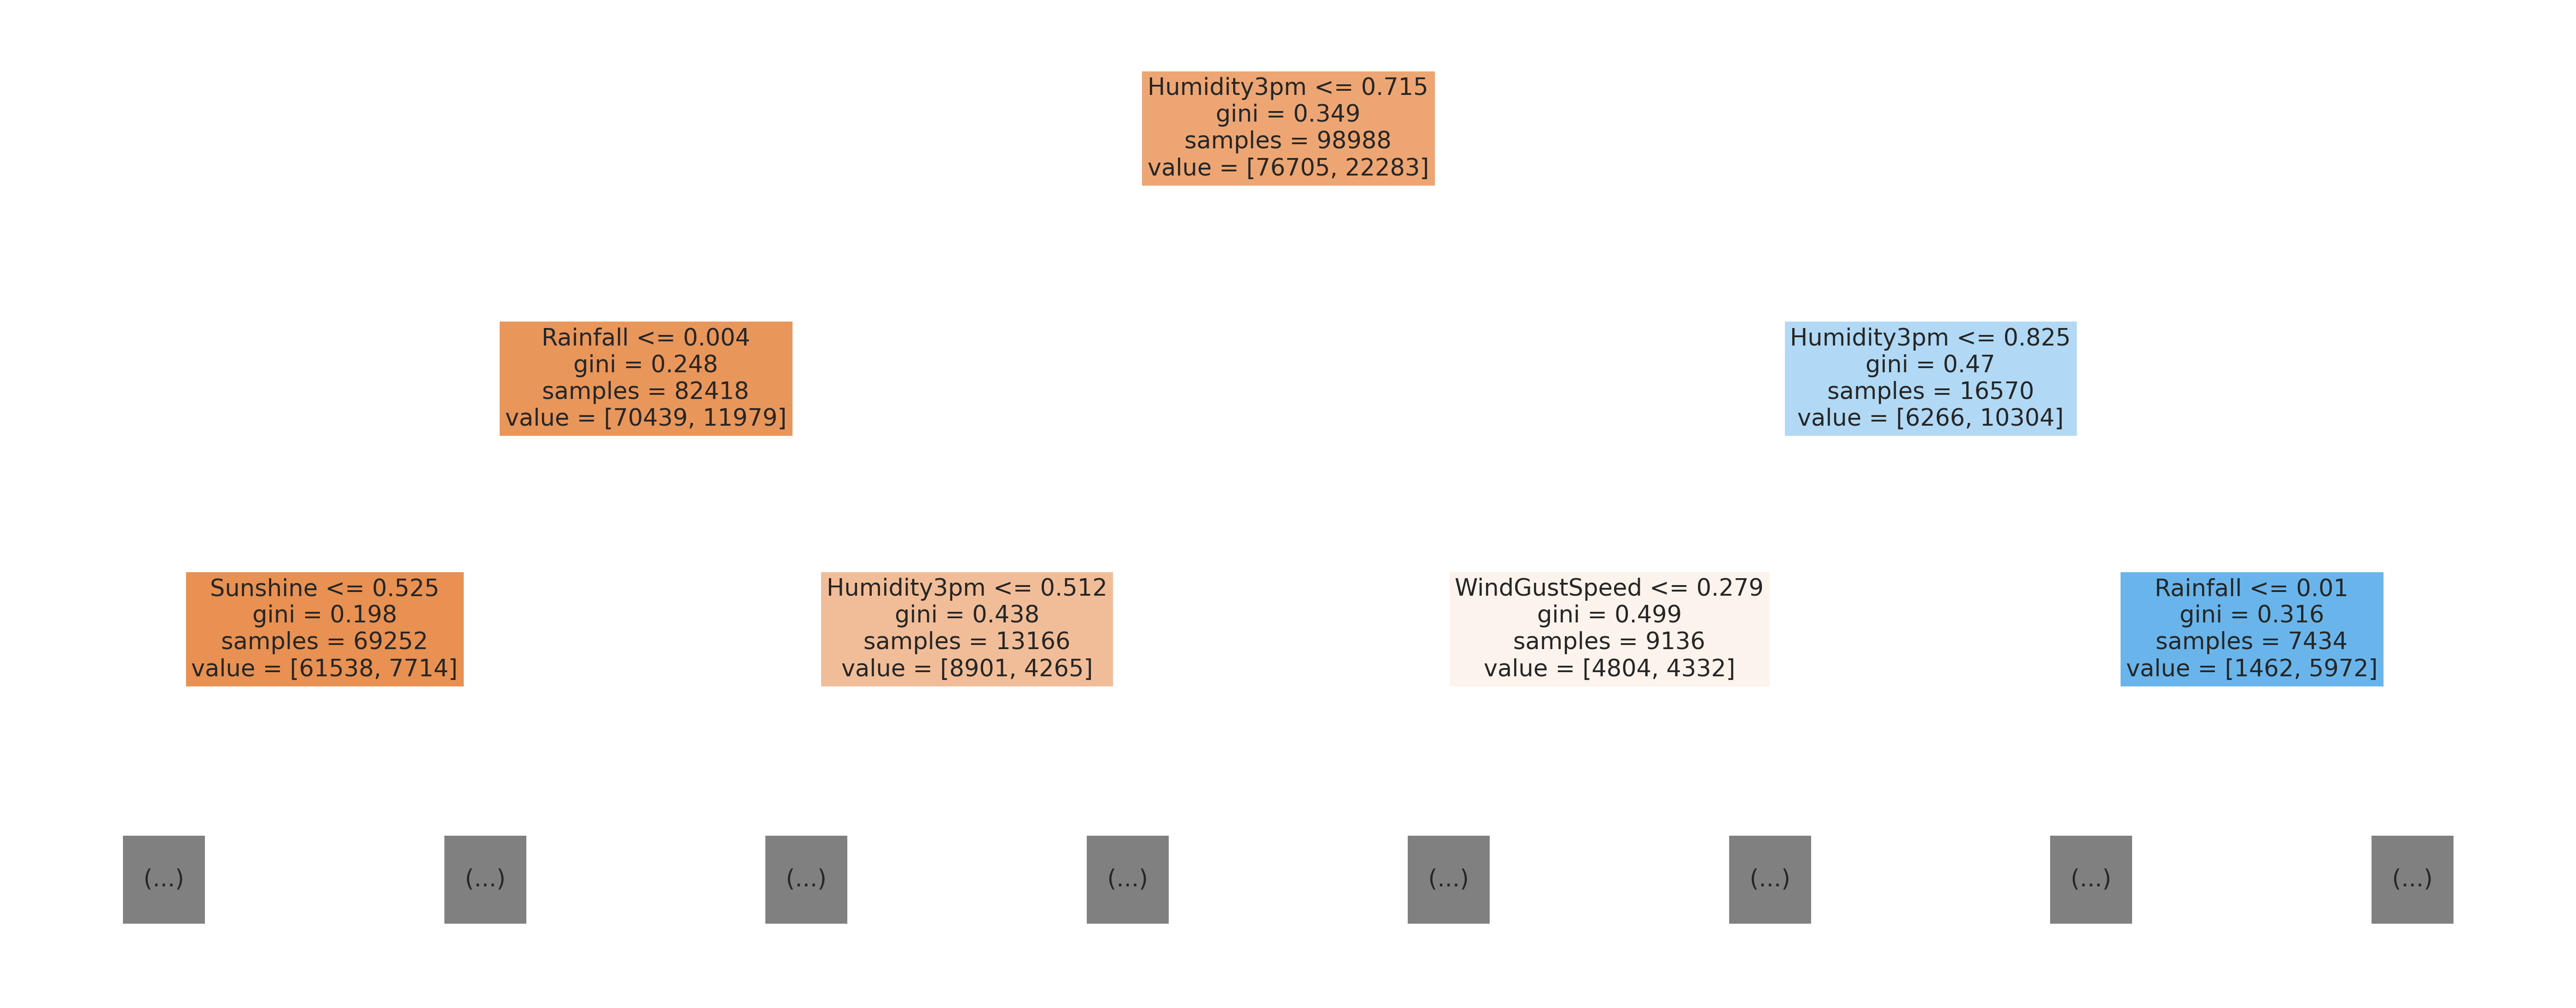

In [ ]:
plt.figure(figsize=(100,40))
plot_tree(model, feature_names= X_train.columns, max_depth=2, filled = True);

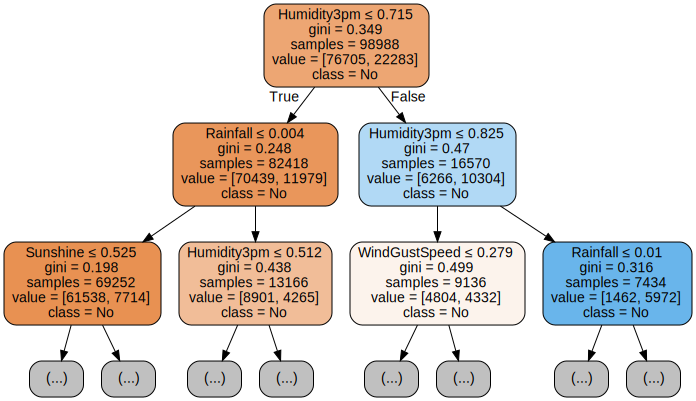

In [ ]:
from sklearn import tree

import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=train_target,  
                              filled=True, rounded=True,  
                              special_characters=True,max_depth=2)

graph = graphviz.Source(dot_data) 

graph 

In [ ]:
model.tree_.max_depth

48

In [ ]:
text_tree = export_text(model,max_depth=10, feature_names=list(X_train.columns))
print(text_tree[:6000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

# Feature Importance

In [ ]:
model.feature_importances_

array([3.52277735e-02, 3.03468159e-02, 5.85238903e-02, 2.30210845e-02,
       5.04585461e-02, 5.50819283e-02, 2.85505513e-02, 3.05498001e-02,
       3.94847269e-02, 2.61454164e-01, 3.46935407e-02, 6.19740758e-02,
       1.29089101e-02, 1.79043626e-02, 3.48891253e-02, 3.11946834e-02,
       2.30162724e-03, 1.86836011e-03, 1.38008941e-03, 6.33290499e-04,
       1.58976311e-03, 1.04846519e-03, 7.31636111e-04, 1.61722486e-03,
       1.12239076e-03, 1.58328252e-03, 8.80636670e-04, 2.14566638e-03,
       1.74691495e-03, 1.60976554e-04, 1.03944496e-03, 1.58859687e-03,
       4.47294511e-04, 7.09388539e-04, 1.49706257e-03, 9.88427798e-04,
       9.04379948e-04, 7.46373354e-04, 1.74825823e-03, 2.16997190e-03,
       3.79218000e-04, 7.02366764e-04, 1.64691420e-03, 1.60402284e-03,
       1.48541639e-03, 1.03704996e-03, 8.26342706e-04, 1.63160607e-03,
       1.10744708e-03, 1.96081721e-03, 7.76664085e-04, 1.52647000e-03,
       9.33109383e-04, 1.02297058e-03, 1.20619481e-03, 3.04126955e-04,
      

In [ ]:
importance_df = pd.DataFrame({
    'features': X_train.columns,
    'importances': model.feature_importances_
}).sort_values('importances', ascending=False)

In [ ]:
importance_df

,features,importances
9,Humidity3pm,0.261454
11,Pressure3pm,0.061974
2,Rainfall,0.058524
5,WindGustSpeed,0.055082
4,Sunshine,0.050459
...,...,...
64,Location_Woomera,0.000415
40,Location_Newcastle,0.000379
55,Location_Townsville,0.000304
57,Location_Uluru,0.000272


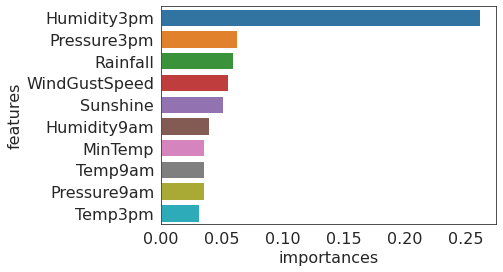

In [ ]:
sns.barplot(data = importance_df.head(10), x = 'importances', y = 'features')

# HyperParameter Tuning and Overfitting

Reducing the overfitting called reguralization

In [ ]:
?DecisionTreeClassifier

#### max_depth

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.fit(X_train,train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
model.score(X_train,train_target)

0.8291308037337859

In [ ]:
model.score(X_val,val_target)

0.8334397307178921

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

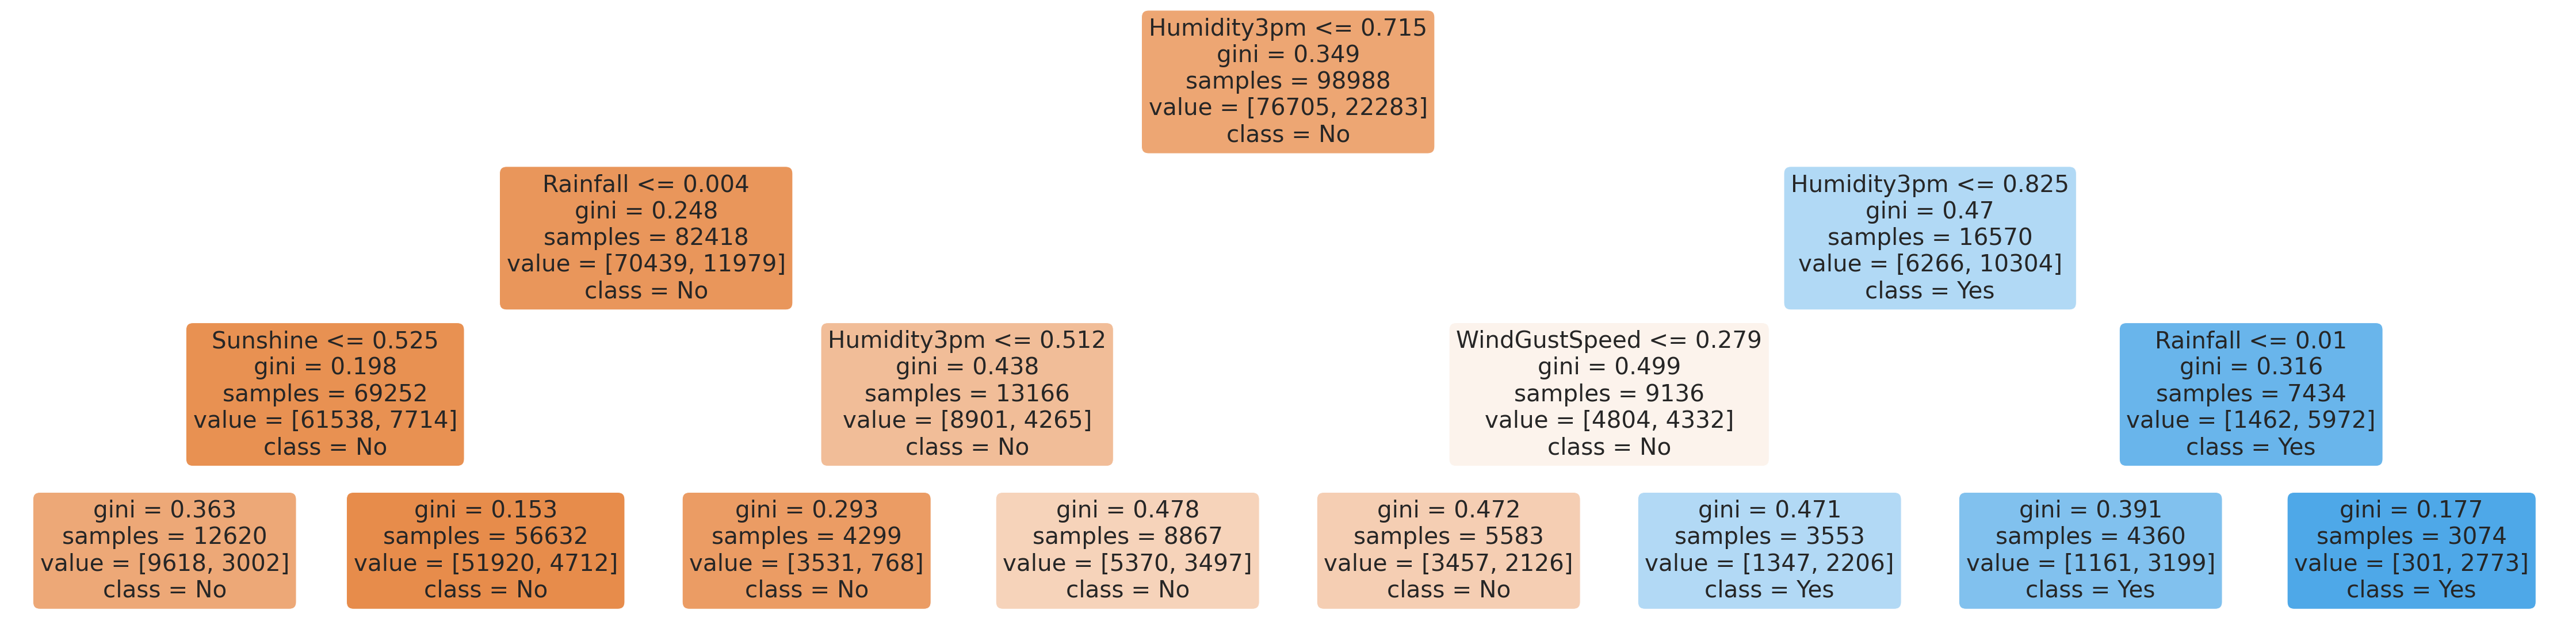

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True,class_names=model.classes_);

In [ ]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [ ]:
def max_depth_error(md):
  model = DecisionTreeClassifier(max_depth=md, random_state=42)
  model.fit(X_train,train_target)
  train_acc = 1 -model.score(X_train,train_target)
  val_acc = 1 - model.score(X_val,val_target)
  return{'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [ ]:
%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


In [ ]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.157739
8,9,0.140916,0.156578
9,10,0.132966,0.157565


''

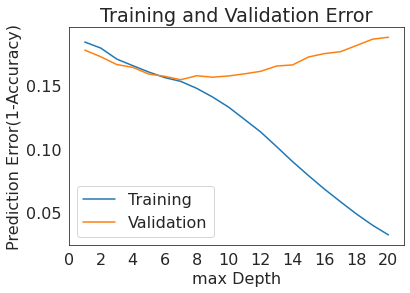

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'],errors_df['Training Error'])
plt.plot(errors_df['Max Depth'],errors_df['Validation Error'])
plt.title('Training and Validation Error')
plt.xticks(range(0,21,2))
plt.xlabel('max Depth')
plt.ylabel('Prediction Error(1-Accuracy)')
plt.legend(['Training','Validation'])
;

In [ ]:
model = DecisionTreeClassifier(max_depth=7, random_state=42)
model.fit(X_train,train_target)
model.score(X_val,val_target)

0.8453949277465034

### max_leaf_nodes

In [ ]:
model  = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [ ]:
model.fit(X_train,train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=128,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
model.score(X_train,train_target)

0.8480421869317493

In [ ]:
model.score(X_val,val_target)

0.8442342290058615

In [ ]:
model.tree_.max_depth

12

In [ ]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

# Train a Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs= -1, random_state=42)

In [ ]:
%%time
model.fit(X_train,train_target)

CPU times: user 40.3 s, sys: 232 ms, total: 40.5 s
Wall time: 20.8 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
model.score(X_train,train_target)

0.9999595910615429

In [ ]:
model.score(X_val,val_target)

0.8559572862863444

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.9 , 0.1 ],
       [0.97, 0.03],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.95, 0.05]])